Capstone 2022 - 2023
Written by James Hinkle and Patric McCool

In [115]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt

In [116]:
crime = pd.read_csv("violenceprojectfulldatabase.csv", sep=",")

In [117]:
crime.head()

,Case #,Perpetrator Name,Unnamed: 2,Date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Location,Unnamed: 9,...,Weapons,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Resolution of Case,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142
0,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence,NaN
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,3,7,1,"hatchet, hammer, knives, wrench, ropes, water,...",1,0,2,0,NaN
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,0,1,1,1,"knife, nylon cord",2,0,1,1,NaN
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,1,3,2,1,holster,1,0,2,0,NaN
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,1,0,NaN,2,0,0,3,NaN


In [118]:
crime.shape

(352, 143)

The header is first row for some reason, have to fix this

In [119]:
crime.columns = crime.iloc[0] #Make the first row the header
crime = crime.iloc[1:, :] #Drop the first row

In [120]:
crime.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence,NaN
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,3,7,1,"hatchet, hammer, knives, wrench, ropes, water,...",1,0,2,0,NaN
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,0,1,1,1,"knife, nylon cord",2,0,1,1,NaN
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,1,3,2,1,holster,1,0,2,0,NaN
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,1,0,NaN,2,0,0,3,NaN
5,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,"Pennsylvania Turnpike near Harrisburg, PA",Harrisburg,...,0,3,2,0,NaN,0,0,2,0,NaN


In [121]:
col = crime.columns.tolist()
print(col)

['Case #', 'Shooter Last Name', 'Shooter First Name', 'Full Date', 'Day of Week', 'Day', 'Month', 'Year', 'Shooting Location Address', 'City', 'State', 'State Code', 'Region', 'Urban/Suburban/Rural', 'Location', 'Insider / Outsider', 'Workplace shooting', 'Multiple Locations', 'Other Location', 'Armed Person on Scene', 'Specify Armed Person', 'Number Killed', 'Number Injured', 'Family Member Victim', 'Romantic Partner Victim', 'Kidnapping or Hostage Situation', 'Age', 'Gender', 'Race', 'Immigrant', 'Sexual Orientation', 'Religion', 'Education', 'School Performance', 'School Performance Specified', 'Birth Order', 'Number of Siblings', 'Older Siblings', 'Younger Siblings', 'Relationship Status', 'Children', 'Employment Status', 'Employment Type\xa0', 'Military Service', 'Military Branch', 'Community Involvement', 'Community Involvement Specified', 'Known to Police or FBI', 'Criminal Record', 'Part I Crimes', 'Part II Crimes', 'Highest Level of Criminal Justice Involvement', 'History of P

In [122]:
crime = crime.loc[:, crime.columns.notna()] #Drop columns labeled as NAN

In [123]:
crime.shape

(351, 142)

In [124]:
pd.set_option('display.max_rows', 1000)

In [125]:
navalues = crime.isna().sum()
print(navalues) #see which columns have the most NA

0
Case #                                           170
Shooter Last Name                                171
Shooter First Name                               171
Full Date                                        170
Day of Week                                      170
Day                                              170
Month                                            170
Year                                             170
Shooting Location Address                        170
City                                             170
State                                            170
State Code                                       170
Region                                           170
Urban/Suburban/Rural                             170
Location                                         170
Insider / Outsider                               170
Workplace shooting                               170
Multiple Locations                               170
Other Location                              

Drop the columns with the majority NAN

In [126]:
crime.drop(['Military Branch','Specify Other Weapons or Gear', 'Health Issues - Specify','Specify Pop Culture Connection', 'Psychiatric Medication Specified','Community Involvement Specified'], axis = 'columns', inplace = True )

In [127]:
crime.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Shooting Location Address,City,...,Planning,Performance,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Attempt to Flee,Insanity Defense,Criminal Sentence
1,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,"110 Inner Campus Drive, Austin, TX 78705",Austin,...,1,0,1,3,7,1,1,0,2,0
2,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,"Rose-Mar College of Beauty in Mesa, AZ",Mesa,...,1,1,0,1,1,1,2,0,1,1
3,3,Held,Leo,10/23/1967,Monday,23,10,1967,"599 South Highland Street Lockhaven, PA 17745",Lock Haven,...,0,0,1,3,2,1,1,0,2,0
4,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,"11703 Lake Rd, Ironwood, MI 49938",Ironwood,...,0,0,0,0,1,0,2,0,0,3
5,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,"Pennsylvania Turnpike near Harrisburg, PA",Harrisburg,...,0,0,0,3,2,0,0,0,2,0


In [128]:
crime.shape

(351, 136)

In [129]:
result = crime.dtypes
print(result)

0
Case #                                           object
Shooter Last Name                                object
Shooter First Name                               object
Full Date                                        object
Day of Week                                      object
Day                                              object
Month                                            object
Year                                             object
Shooting Location Address                        object
City                                             object
State                                            object
State Code                                       object
Region                                           object
Urban/Suburban/Rural                             object
Location                                         object
Insider / Outsider                               object
Workplace shooting                               object
Multiple Locations                            

In [161]:
crime.convert_dtypes()
pd.to_numeric(crime["Autism Spectrum"], errors='coerce')
crime["Autism Spectrum"] = pd.to_numeric(crime["Autism Spectrum"], errors='coerce').convert_dtypes() 

In [162]:
result = crime.dtypes
print(result)

0
Case #                                           object
Shooter Last Name                                object
Shooter First Name                               object
Full Date                                        object
Day of Week                                      object
Day                                              object
Month                                            object
Year                                             object
Shooting Location Address                        object
City                                             object
State                                            object
State Code                                       object
Region                                           object
Urban/Suburban/Rural                             object
Location                                         object
Insider / Outsider                               object
Workplace shooting                               object
Multiple Locations                            

In [159]:
crime2 = crime[crime['Autism Spectrum'].notna()]

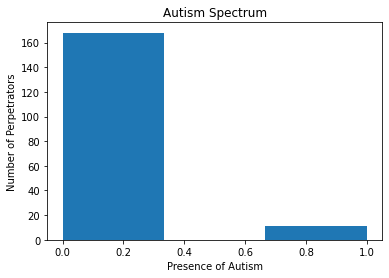

In [160]:
#histogram plot to find count of mental illnesses
x = crime2["Autism Spectrum"]
plt.hist(x, bins =3)

plt.title("Autism Spectrum")

plt.ylabel("Number of Perpetrators")
plt.xlabel("Presence of Autism")
plt.show()

In [134]:
crime.convert_dtypes()
pd.to_numeric(crime["Mental Illness"], errors='coerce')
crime["Mental Illness"] = pd.to_numeric(crime["Mental Illness"], errors='coerce').convert_dtypes() 
print(crime["Mental Illness"])

1         1
2         2
3         4
4         0
5         2
6         0
7         1
8         0
9         4
10        4
11        2
12        0
13        0
14        4
15        2
16        0
17        0
18        4
19        2
20        0
21        2
22        0
23        2
24        4
25        3
26        0
27        0
28        2
29        2
30        0
31        0
32        4
33        4
34        0
35        2
36     <NA>
37        1
38        1
39        0
40        2
41        4
42        4
43        3
44        4
45     <NA>
46     <NA>
47        0
48        0
49        4
50        0
51        1
52        2
53        4
54        1
55        2
56        3
57        1
58        0
59        2
60        4
61        0
62        4
63        0
64        0
65        0
66        1
67        0
68        0
69     <NA>
70        3
71        1
72        1
73        3
74        4
75        2
76        2
77        1
78        1
79        2
80     <NA>
81        2
82        0
83     <NA>
84  

In [148]:
crime2 = crime[crime['Mental Illness'].notna()]

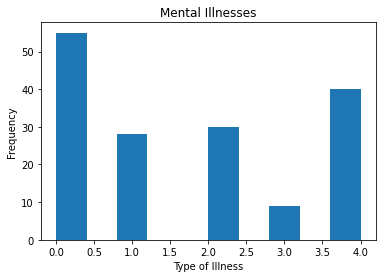

In [149]:
#histogram plot to find count of mental illnesses
x = crime2["Mental Illness"]
plt.hist(x)

plt.title("Mental Illnesses")

plt.ylabel("Frequency")
plt.xlabel("Type of Illness")
plt.show()

In [137]:
crime.convert_dtypes()
pd.to_numeric(crime["Relationship Status"], errors='coerce')
crime["Relationship Status"] = pd.to_numeric(crime["Relationship Status"], errors='coerce').convert_dtypes() 

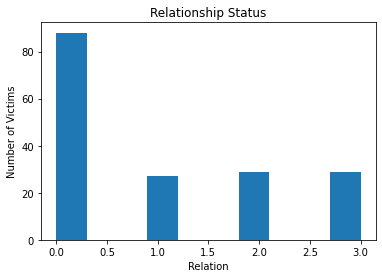

In [153]:
crime2 = crime[crime['Relationship Status'].notna()]
x = crime2["Relationship Status"]
plt.hist(x)

plt.title("Relationship Status")

plt.ylabel("Number of Victims")
plt.xlabel("Relation")
plt.show()

In [150]:
crime.convert_dtypes()
pd.to_numeric(crime["Number Killed"], errors='coerce')
crime["Number Killed"] = pd.to_numeric(crime["Number Killed"], errors='coerce').convert_dtypes() 

crime.convert_dtypes()
pd.to_numeric(crime["Age"], errors='coerce')
crime["Age"] = pd.to_numeric(crime["Age"], errors='coerce').convert_dtypes() 

ValueError: x and y must be the same size

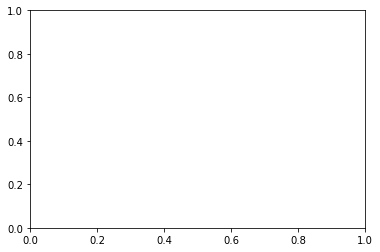

In [152]:
crime2 = crime[crime['Number Killed'].notna()]
crime3 = crime[crime['Age'].notna()]
y = crime2["Number Killed"]
x = crime3["Age"]

plt.scatter(x,y)

plt.title("Age Breakdown")
plt.ylabel("Age of Victim")
plt.xlabel("Number of Victims")

plt.show()

In [151]:
result = crime.dtypes
print(result)

0
Case #                                           object
Shooter Last Name                                object
Shooter First Name                               object
Full Date                                        object
Day of Week                                      object
Day                                              object
Month                                            object
Year                                             object
Shooting Location Address                        object
City                                             object
State                                            object
State Code                                       object
Region                                           object
Urban/Suburban/Rural                             object
Location                                         object
Insider / Outsider                               object
Workplace shooting                               object
Multiple Locations                            